In [1]:
# --- INSTALLS ---
!pip install transformers peft datasets accelerate sentence-transformers torchvision torchaudio diffusers
!pip install bitsandbytes faiss-cpu --quiet
!pip install huggingface_hub --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing

In [2]:
# --- IMPORTS ---
import os
import glob
import torch
import faiss
import random
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from datasets import Dataset
from torchvision import transforms
from sentence_transformers import SentenceTransformer
from diffusers import StableDiffusionPipeline
from huggingface_hub import login

2025-04-26 11:52:43.847472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745668364.035673      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745668364.090652      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# --- CONFIG ---
dataset_root = "/kaggle/input/best-artworks-of-all-time/images/images"
description_root = "/kaggle/input/description-of-the-paintings-best-artworks"
device = "cuda" if torch.cuda.is_available() else "cpu"
embedding_model_name = "sentence-transformers/all-MiniLM-L6-v2"

In [4]:
# --- LOGIN TO HF IF NEEDED ---
login()  # 🔐

In [5]:
# --- MODELS ---
embedding_model = SentenceTransformer(embedding_model_name).to(device)
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to(device)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
image_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [7]:
# --- LOAD IMAGE/DESCRIPTION PAIRS ---
def get_image_description_pairs():
    desc_map = {}
    for folder in ['descriptions1', 'descriptions2', 'descriptions (5)']:
        desc_files = glob.glob(f"{description_root}/{folder}/*.txt")
        for fpath in desc_files:
            fname = os.path.basename(fpath).split('.')[0]
            with open(fpath, 'r', encoding='utf-8') as f:
                desc_map[fname] = f.read().strip()

    pairs = []
    folders = sorted(os.listdir(dataset_root))
    for folder in folders:
        full_path = os.path.join(dataset_root, folder)
        for img_path in glob.glob(f"{full_path}/*.jpg"):
            fname = os.path.basename(img_path).split('.')[0]
            if fname in desc_map:
                pairs.append((img_path, desc_map[fname]))
    return pairs

In [8]:
pairs = get_image_description_pairs()
print(f"✅ Found {len(pairs)} image/description pairs.")

✅ Found 8708 image/description pairs.


In [9]:
# --- PREPARE DATASET ---
def prepare_dataset(pairs):
    data = []
    for img_path, desc in pairs:
        try:
            img = Image.open(img_path).convert("RGB")
            img_tensor = image_transform(img)
            data.append({"image": img_tensor, "chunk": desc, "path": img_path})
        except Exception as e:
            print(f"⚠️ {img_path} failed: {e}")
    return Dataset.from_list(data)

In [10]:
dataset = prepare_dataset(pairs)

In [11]:
# --- FAISS INDEX ---
print("📚 Building FAISS index...")
desc_embeds = embedding_model.encode(dataset["chunk"], convert_to_numpy=True, show_progress_bar=True)
index = faiss.IndexFlatL2(desc_embeds.shape[1])
index.add(desc_embeds)

📚 Building FAISS index...


Batches:   0%|          | 0/273 [00:00<?, ?it/s]

In [12]:
# --- RETRIEVAL ---
def retrieve_similar_chunks(query, top_k=5):
    query_emb = embedding_model.encode([query])
    D, I = index.search(query_emb, top_k)
    return [dataset[int(i)]["chunk"] for i in I[0]]


In [13]:
# --- SMART PROMPT FUSION ---
def create_final_prompt(user_prompt, artist_name, retrieved_chunks):
    # Combine prompt + retrieved artistic style
    style_description = " ".join(random.sample(retrieved_chunks, min(3, len(retrieved_chunks))))
    
    final_prompt = f"{user_prompt}, in the artistic style of {artist_name}. Artistic details: {style_description}"
    return final_prompt


In [14]:
# --- GENERATE IMAGE ---
def generate_image(user_prompt, artist_name, show=True):
    retrieved_chunks = retrieve_similar_chunks(artist_name)  # retrieve based on artist name
    final_prompt = create_final_prompt(user_prompt, artist_name, retrieved_chunks)
    
    with torch.no_grad():
        image = pipe(final_prompt).images[0]
    
    if show:
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"🎨 {artist_name} Style")
        plt.show()
    
    return image, final_prompt


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['1 . jpg description : renaissance portrait , soft sfumato , muted earthy tones , serene and enigmatic expression , subtle gradations of light and shadow , smooth brushstrokes , landscape background fading into atmospheric perspective . image : leonardo _ da _ vinci _ 6 1 . jpg description : renaissance - style sketch of a person in profile . sparse linework with varied thickness . sepia tones on textured paper , conveying historical introspection .']


  0%|          | 0/50 [00:00<?, ?it/s]

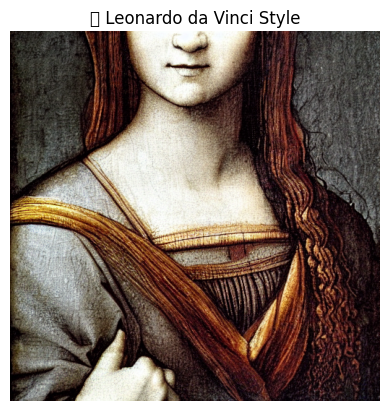

📝 Final Prompt:
 a happy women, in the artistic style of Leonardo da Vinci. Artistic details: Image: Leonardo_da_Vinci_52.jpg
Description: Renaissance portrait, chiaroscuro lighting, subtle brushstrokes, muted earthy tones, contemplative mood, side view, with details of fine curly hair and soft skin texture. Image: Leonardo_da_Vinci_121.jpg
Description: Renaissance portrait, soft sfumato, muted earthy tones, serene and enigmatic expression, subtle gradations of light and shadow, smooth brushstrokes, landscape background fading into atmospheric perspective. Image: Leonardo_da_Vinci_61.jpg
Description: Renaissance-style sketch of a person in profile. Sparse linework with varied thickness. Sepia tones on textured paper, conveying historical introspection.


In [26]:
# --- TESTING ---
user_prompt = "a happy women"
artist_name = "Leonardo da Vinci"
image, prompt_used = generate_image(user_prompt, artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/tree_leonardo_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['henri _ de _ toulouse - lautrec _ 1 0 . jpg description : portrait in the style of post - impressionism , oil on canvas , with visible brushstrokes creating texture , a warm color palette dominated by yellows and browns , moody and introspective , depicting a figure partially obscured by shadow , creating a sense of mystery and quiet contemplation . image : gustave _ courbet _ 4 1 . jpg description : portrait in the realist style , muted earthy tones , loose brushstrokes , diffused lighting , serene mood , full - body composition against a blurred natural background .']


  0%|          | 0/50 [00:00<?, ?it/s]

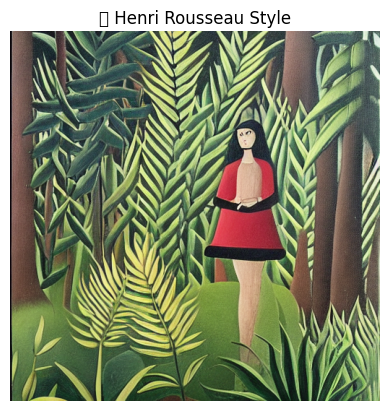

📝 Final Prompt:
 An elegant woman standing in a lush jungle, in the artistic style of Henri Rousseau. Artistic details: Image: Henri_Rousseau_62.jpg
Description: Naive art style, overcast cityscape, somber mood, muted earthy tones, flat perspective, visible brushstrokes, simplified geometric forms, figures with obscured faces, a sense of quiet and solitude. Image: Henri_de_Toulouse-Lautrec_10.jpg
Description: Portrait in the style of post-impressionism, oil on canvas, with visible brushstrokes creating texture, a warm color palette dominated by yellows and browns, moody and introspective, depicting a figure partially obscured by shadow, creating a sense of mystery and quiet contemplation. Image: Gustave_Courbet_41.jpg
Description: Portrait in the Realist style, muted earthy tones, loose brushstrokes, diffused lighting, serene mood, full-body composition against a blurred natural background.


In [16]:
user_prompt = "An elegant woman standing in a lush jungle"
artist_name = "Henri Rousseau"
image, prompt_used = generate_image(user_prompt, artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/woman_rousseau_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ard _ manet _ 5 6 . jpg description : portrait in the style of realism , muted color palette , dark background with implied light source , visible brushstrokes and blended tones , relaxed pose with candid expression , conveys a sense of everyday life and simple pleasures . image : edouard _ manet _ 3 1 . jpg description : portrait in the impressionist style , muted palette of grays and blacks , soft brushstrokes , hazy background , capturing a serene and contemplative mood .']


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


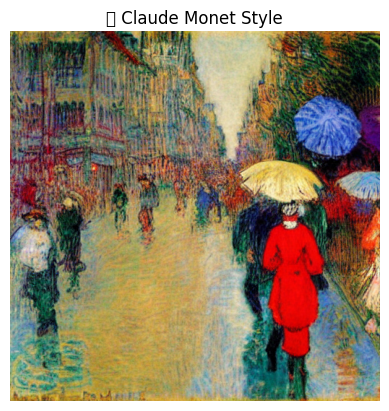

📝 Final Prompt:
 A vibrant street scene full of colorful umbrellas, in the artistic style of Claude Monet. Artistic details: Image: Henri_de_Toulouse-Lautrec_72.jpg
Description: Impressionistic painting of a figure in motion, blurred background, soft palette of greens, yellows and browns, visible brushstrokes, sense of fleeting movement. Image: Edouard_Manet_56.jpg
Description: Portrait in the style of realism, muted color palette, dark background with implied light source, visible brushstrokes and blended tones, relaxed pose with candid expression, conveys a sense of everyday life and simple pleasures. Image: Edouard_Manet_31.jpg
Description: Portrait in the impressionist style, muted palette of grays and blacks, soft brushstrokes, hazy background, capturing a serene and contemplative mood.


In [17]:
# Example 3
user_prompt = "A vibrant street scene full of colorful umbrellas"
artist_name = "Claude Monet"
image, prompt_used = generate_image(user_prompt, artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/street_scene_monet.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lautrec _ 1 0 . jpg description : portrait in the style of post - impressionism , oil on canvas , with visible brushstrokes creating texture , a warm color palette dominated by yellows and browns , moody and introspective , depicting a figure partially obscured by shadow , creating a sense of mystery and quiet contemplation . image : henri _ de _ toulouse - lautrec _ 7 2 . jpg description : impressionistic painting of a figure in motion , blurred background , soft palette of greens , yellows and browns , visible brushstrokes , sense of fleeting movement .']


  0%|          | 0/50 [00:00<?, ?it/s]

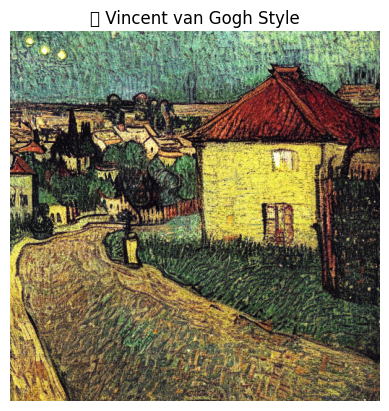

📝 Final Prompt:
 A dreamy starry night over a calm village, in the artistic style of Vincent van Gogh. Artistic details: Image: Henri_de_Toulouse-Lautrec_24.jpg
Description: Oil painting portrait, impressionistic style, textured brushstrokes, muted palette of browns and reds, relaxed pose, introspective mood. Image: Henri_de_Toulouse-Lautrec_10.jpg
Description: Portrait in the style of post-impressionism, oil on canvas, with visible brushstrokes creating texture, a warm color palette dominated by yellows and browns, moody and introspective, depicting a figure partially obscured by shadow, creating a sense of mystery and quiet contemplation. Image: Henri_de_Toulouse-Lautrec_72.jpg
Description: Impressionistic painting of a figure in motion, blurred background, soft palette of greens, yellows and browns, visible brushstrokes, sense of fleeting movement.


In [19]:
# Example 7
user_prompt = "A dreamy starry night over a calm village"
artist_name = "Vincent van Gogh"
image, prompt_used = generate_image(user_prompt, artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/starry_village_vangogh.png")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['jpg description : expressionist portrait , vibrant and clashing colors , angular and distorted features , thick and visible brushstrokes , conveying intensity and unease . image : mikhail _ vrubel _ 5 2 . jpg description : portrait in a watercolor style , muted and melancholic colors , loose brushstrokes and visible pencil lines , close - up view , introspective mood .']


  0%|          | 0/50 [00:00<?, ?it/s]

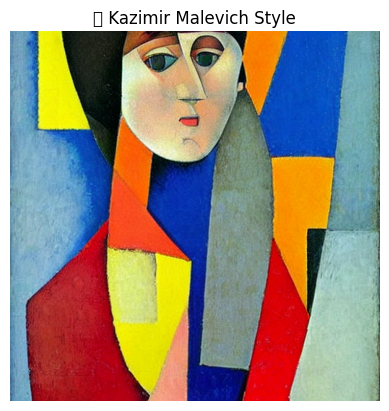

📝 Final Prompt:
 An abstract composition of colorful geometric shapes, in the artistic style of Kazimir Malevich. Artistic details: Image: Amedeo_Modigliani_68.jpg
Description: Portrait in a naive style, elongated face, smooth brushstrokes, muted pastel colors, melancholic mood. Image: Kazimir_Malevich_17.jpg
Description: Expressionist portrait, vibrant and clashing colors, angular and distorted features, thick and visible brushstrokes, conveying intensity and unease. Image: Mikhail_Vrubel_52.jpg
Description: Portrait in a watercolor style, muted and melancholic colors, loose brushstrokes and visible pencil lines, close-up view, introspective mood.


In [22]:
# --- TESTING ---
user_prompt = "An abstract composition of colorful geometric shapes"
artist_name = "Kazimir Malevich"
image, prompt_used = generate_image(user_prompt, artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/abstract_malevich_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['bet _ 4 1 . jpg description : portrait in the realist style , muted earthy tones , loose brushstrokes , diffused lighting , serene mood , full - body composition against a blurred natural background . image : henri _ matisse _ 1 5 8 . jpg description : abstract expressionist portrait , vibrant and energetic , thick impasto brushstrokes , vivid primary colors with secondary hues , loose composition , emotional intensity .']


  0%|          | 0/50 [00:00<?, ?it/s]

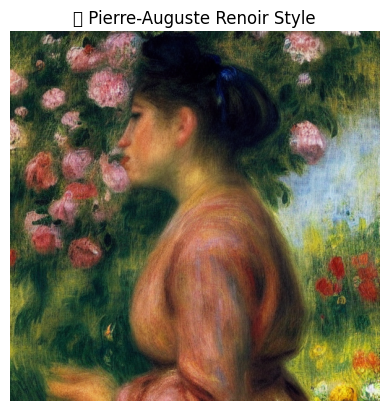

📝 Final Prompt:
 A lush garden with vibrant flowers and soft lighting, in the artistic style of Pierre-Auguste Renoir. Artistic details: Image: Gustave_Courbet_59.jpg
Description: Realist portrait painting, close-up, dramatic lighting, panicked expression, impasto brushstrokes, muted earthy tones, stark contrasts, intense emotion. Image: Gustave_Courbet_41.jpg
Description: Portrait in the Realist style, muted earthy tones, loose brushstrokes, diffused lighting, serene mood, full-body composition against a blurred natural background. Image: Henri_Matisse_158.jpg
Description: Abstract expressionist portrait, vibrant and energetic, thick impasto brushstrokes, vivid primary colors with secondary hues, loose composition, emotional intensity.


In [24]:
# --- TESTING ---
user_prompt = "A lush garden with vibrant flowers and soft lighting"
artist_name = "Pierre-Auguste Renoir"
image, prompt_used = generate_image(user_prompt, artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/garden_renoir_style.png")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['azquez _ 4 6 . jpg description : portrait in the style of baroque , dark and muted tones , loose brushstrokes , a single figure with a dark backdrop , intense gaze . image : gustave _ courbet _ 4 1 . jpg description : portrait in the realist style , muted earthy tones , loose brushstrokes , diffused lighting , serene mood , full - body composition against a blurred natural background .']


  0%|          | 0/50 [00:00<?, ?it/s]

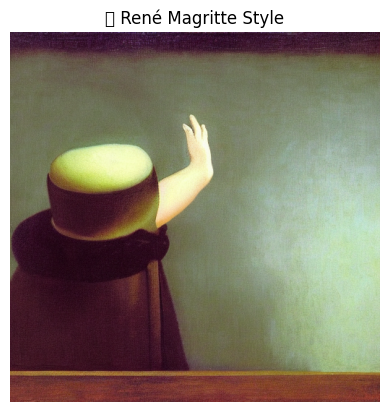

📝 Final Prompt:
 A mysterious dreamscape filled with floating objects, in the artistic style of René Magritte. Artistic details: Image: Gustave_Courbet_26.jpg
Description: Portrait in the style of dramatic realism, dark earthy tones of brown and umber, visible brushstrokes, chiaroscuro lighting, conveying deep concentration and melancholy. Image: Diego_Velazquez_46.jpg
Description: Portrait in the style of baroque, dark and muted tones, loose brushstrokes, a single figure with a dark backdrop, intense gaze. Image: Gustave_Courbet_41.jpg
Description: Portrait in the Realist style, muted earthy tones, loose brushstrokes, diffused lighting, serene mood, full-body composition against a blurred natural background.


In [27]:
# --- TESTING ---
user_prompt = "A mysterious dreamscape filled with floating objects"
artist_name = "René Magritte"
image, prompt_used = generate_image(user_prompt, artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/dream_magritte_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. jpg description : a bosch - style painting of human figures in a desolate landscape , rendered with rough , textured brushstrokes . the color palette is muted and earthy , dominated by browns and ochres . the mood is somber and unsettling , conveying a sense of existential dread . figures are distorted and anatomically incorrect , set against a dark , unfocused background . image : hieronymus _ bosch _ 4 3 . jpg description : northern renaissance painting . vertical composition , panoramic view . figures engaged in bizarre activities amidst a landscape with murky greens and yellows . oil painting texture with visible brushstrokes and distorted perspective . a mood of strange merriment .']


  0%|          | 0/50 [00:00<?, ?it/s]

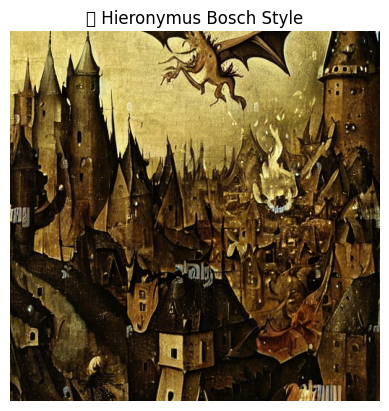

📝 Final Prompt:
 A dragon soaring over a burning village, in the artistic style of Hieronymus Bosch. Artistic details: Image: Hieronymus_Bosch_90.jpg
Description: Renaissance portrait, side profile, aged skin texture, muted browns and whites, close-up, heavy shadows, melancholic, detailed brushstrokes. Image: Hieronymus_Bosch_55.jpg
Description: A Bosch-style painting of human figures in a desolate landscape, rendered with rough, textured brushstrokes. The color palette is muted and earthy, dominated by browns and ochres. The mood is somber and unsettling, conveying a sense of existential dread. Figures are distorted and anatomically incorrect, set against a dark, unfocused background. Image: Hieronymus_Bosch_43.jpg
Description: Northern Renaissance painting. Vertical composition, panoramic view. Figures engaged in bizarre activities amidst a landscape with murky greens and yellows. Oil painting texture with visible brushstrokes and distorted perspective. A mood of strange merriment.


In [29]:
# --- TESTING WEIRD + FANTASY STYLE ---

# 1. A dragon soaring over a burning village
artist_name = "Hieronymus Bosch"
image, prompt_used = generate_image("A dragon soaring over a burning village", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/dragon_bosch_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['1 0 . jpg description : portrait in the style of post - impressionism , oil on canvas , with visible brushstrokes creating texture , a warm color palette dominated by yellows and browns , moody and introspective , depicting a figure partially obscured by shadow , creating a sense of mystery and quiet contemplation . image : edouard _ manet _ 5 6 . jpg description : portrait in the style of realism , muted color palette , dark background with implied light source , visible brushstrokes and blended tones , relaxed pose with candid expression , conveys a sense of everyday life and simple pleasures .']


  0%|          | 0/50 [00:00<?, ?it/s]

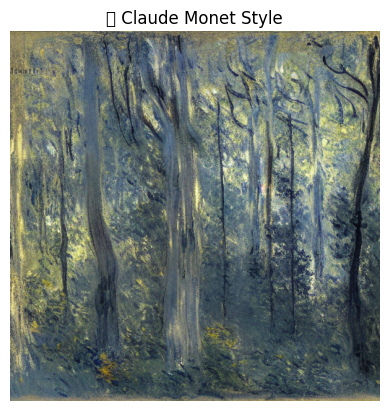

📝 Final Prompt:
 An ancient forest inhabited by luminous wolves, in the artistic style of Claude Monet. Artistic details: Image: Edouard_Manet_31.jpg
Description: Portrait in the impressionist style, muted palette of grays and blacks, soft brushstrokes, hazy background, capturing a serene and contemplative mood. Image: Henri_de_Toulouse-Lautrec_10.jpg
Description: Portrait in the style of post-impressionism, oil on canvas, with visible brushstrokes creating texture, a warm color palette dominated by yellows and browns, moody and introspective, depicting a figure partially obscured by shadow, creating a sense of mystery and quiet contemplation. Image: Edouard_Manet_56.jpg
Description: Portrait in the style of realism, muted color palette, dark background with implied light source, visible brushstrokes and blended tones, relaxed pose with candid expression, conveys a sense of everyday life and simple pleasures.


In [30]:
# 2. An ancient forest inhabited by luminous wolves
artist_name = "Claude Monet"
image, prompt_used = generate_image("An ancient forest inhabited by luminous wolves", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/luminous_wolves_monet_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['velazquez _ 7 8 . jpg description : classical portraiture , somber mood , dark earth tones , loose brushstrokes , blurred edges , high contrast , thoughtful expression , plain background . image : pablo _ picasso _ 3 1 6 . jpg description : cubist portrait , muted grayscale palette , geometric shapes and planes , bold black outlines , textured brushstrokes , melancholic mood , fragmented form , distorted perspective .']


  0%|          | 0/50 [00:00<?, ?it/s]

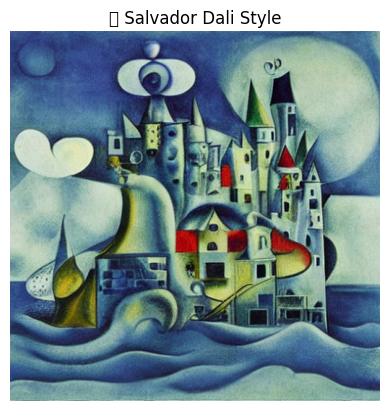

📝 Final Prompt:
 A surreal castle floating above the sea, in the artistic style of Salvador Dali. Artistic details: Image: Marc_Chagall_162.jpg
Description: Monochromatic cubist scene, various subjects, sharp geometric facets, ethereal and otherworldly mood, composed in shades of blue, swirling clouds at the bottom, classical figurative elements. Image: Diego_Velazquez_78.jpg
Description: Classical portraiture, somber mood, dark earth tones, loose brushstrokes, blurred edges, high contrast, thoughtful expression, plain background. Image: Pablo_Picasso_316.jpg
Description: Cubist portrait, muted grayscale palette, geometric shapes and planes, bold black outlines, textured brushstrokes, melancholic mood, fragmented form, distorted perspective.


In [31]:
# 3. A surreal castle floating above the sea
artist_name = "Salvador Dali"
image, prompt_used = generate_image("A surreal castle floating above the sea", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/floating_castle_dali_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['_ 4 1 . jpg description : portrait in the realist style , muted earthy tones , loose brushstrokes , diffused lighting , serene mood , full - body composition against a blurred natural background . image : gustave _ courbet _ 5 9 . jpg description : realist portrait painting , close - up , dramatic lighting , panicked expression , impasto brushstrokes , muted earthy tones , stark contrasts , intense emotion .']


  0%|          | 0/50 [00:00<?, ?it/s]

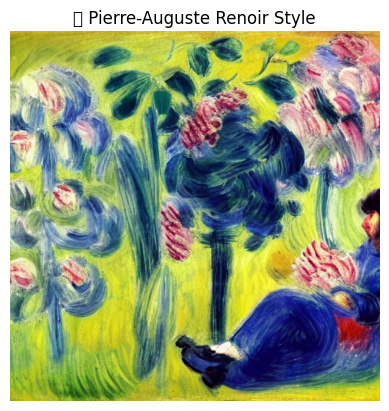

📝 Final Prompt:
 A giant ogre sitting peacefully in a flowery field, in the artistic style of Pierre-Auguste Renoir. Artistic details: Image: Henri_Matisse_158.jpg
Description: Abstract expressionist portrait, vibrant and energetic, thick impasto brushstrokes, vivid primary colors with secondary hues, loose composition, emotional intensity. Image: Gustave_Courbet_41.jpg
Description: Portrait in the Realist style, muted earthy tones, loose brushstrokes, diffused lighting, serene mood, full-body composition against a blurred natural background. Image: Gustave_Courbet_59.jpg
Description: Realist portrait painting, close-up, dramatic lighting, panicked expression, impasto brushstrokes, muted earthy tones, stark contrasts, intense emotion.


In [32]:
# 4. A giant ogre sitting peacefully in a flowery field
artist_name = "Pierre-Auguste Renoir"
image, prompt_used = generate_image("A giant ogre sitting peacefully in a flowery field", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/ogre_flowery_renoir_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["figures , soft lighting , warm earthy tones , delicate brushstrokes creating a slightly blurred , dreamlike quality . depict subtle textures and highlights , with attention to the subjects ' expressions and attire . conveys a sense of quiet formality and restrained emotion . image : caravaggio _ 1 2 . jpg description : baroque painting , dramatic chiaroscuro , deep shadows engulfing the scene , spotlight on figures , muted earthy tones , oil on canvas texture , intense emotion , theatrical composition ."]


  0%|          | 0/50 [00:00<?, ?it/s]

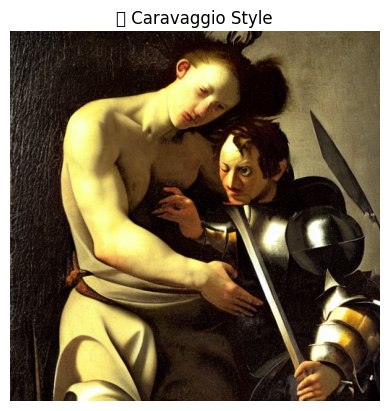

📝 Final Prompt:
 A knight battling a shadow monster in a storm, in the artistic style of Caravaggio. Artistic details: Image: Caravaggio_14.jpg
Description: Baroque portrait, dark and muted palette, chiaroscuro lighting, textured brushstrokes, a contemplative mood, medium shot. Image: Caravaggio_10.jpg
Description: Renaissance-style portrait of two figures, soft lighting, warm earthy tones, delicate brushstrokes creating a slightly blurred, dreamlike quality. Depict subtle textures and highlights, with attention to the subjects' expressions and attire. Conveys a sense of quiet formality and restrained emotion. Image: Caravaggio_12.jpg
Description: Baroque painting, dramatic chiaroscuro, deep shadows engulfing the scene, spotlight on figures, muted earthy tones, oil on canvas texture, intense emotion, theatrical composition.


In [34]:
# 6. A knight battling a shadow monster in a storm
artist_name = "Caravaggio"
image, prompt_used = generate_image("A knight battling a shadow monster in a storm", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/knight_shadow_caravaggio_style.png")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['chagall _ 5 6 . jpg description : portrait in an expressive post - impressionist style , featuring bold , visible brushstrokes and flattened perspective ; a red dress with white lace , and a muted color palette , evoking a sense of quiet contemplation . image : marc _ chagall _ 4 5 . jpg description : expressionist portrait in cool blues and greys , thick brushstrokes , distorted features , conveying melancholy and introspection .']


  0%|          | 0/50 [00:00<?, ?it/s]

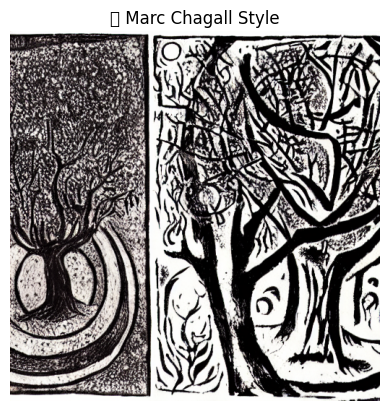

📝 Final Prompt:
 A labyrinth made of living trees under a blood-red moon, in the artistic style of Marc Chagall. Artistic details: Image: Marc_Chagall_234.jpg
Description: Woodcut-style illustration, black and white, figures outlined with bold lines, textured shading, folk art, slightly distorted perspective, somber mood. Image: Marc_Chagall_56.jpg
Description: Portrait in an expressive post-impressionist style, featuring bold, visible brushstrokes and flattened perspective; a red dress with white lace, and a muted color palette, evoking a sense of quiet contemplation. Image: Marc_Chagall_45.jpg
Description: Expressionist portrait in cool blues and greys, thick brushstrokes, distorted features, conveying melancholy and introspection.


In [35]:
# 7. A labyrinth made of living trees under a blood-red moon
artist_name = "Marc Chagall"
image, prompt_used = generate_image("A labyrinth made of living trees under a blood-red moon", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/labyrinth_trees_chagall_style.png")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sense of observation and detachment . image : vincent _ van _ gogh _ 8 7 1 . jpg description : monochromatic sketch of a standing figure , rendered in dense , parallel hatching . soft , muted tones . captures a somber and contemplative mood . full body shot , simple composition . image : henri _ de _ toulouse - lautrec _ 7 2 . jpg description : impressionistic painting of a figure in motion , blurred background , soft palette of greens , yellows and browns , visible brushstrokes , sense of fleeting movement .']


  0%|          | 0/50 [00:00<?, ?it/s]

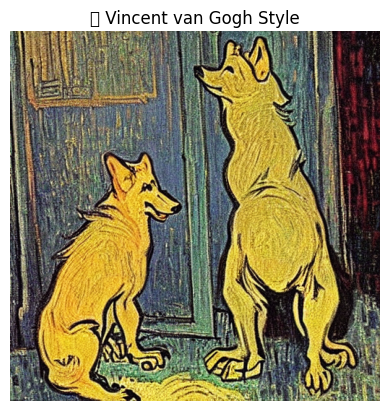

📝 Final Prompt:
 A two-headed wolf guarding an ancient portal, in the artistic style of Vincent van Gogh. Artistic details: Image: Henri_de_Toulouse-Lautrec_51.jpg
Description: Post-Impressionist painting of a crowded interior scene; muted color palette of creams, blacks, and reds; visible brushstrokes; cropped composition with figures facing away, conveying a sense of observation and detachment. Image: Vincent_van_Gogh_871.jpg
Description: Monochromatic sketch of a standing figure, rendered in dense, parallel hatching. Soft, muted tones. Captures a somber and contemplative mood. Full body shot, simple composition. Image: Henri_de_Toulouse-Lautrec_72.jpg
Description: Impressionistic painting of a figure in motion, blurred background, soft palette of greens, yellows and browns, visible brushstrokes, sense of fleeting movement.


In [36]:
# 8. A two-headed wolf guarding an ancient portal
artist_name = "Vincent van Gogh"
image, prompt_used = generate_image("A two-headed wolf guarding an ancient portal", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/two_headed_wolf_vangogh_style.png")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['1 6 . jpg description : cubist portrait , muted grayscale palette , geometric shapes and planes , bold black outlines , textured brushstrokes , melancholic mood , fragmented form , distorted perspective . image : pablo _ picasso _ 3 0 8 . jpg description : portrait in blues : somber , melancholic atmosphere ; simplified forms , thick impasto brushstrokes , limited palette , introspection .']


  0%|          | 0/50 [00:00<?, ?it/s]

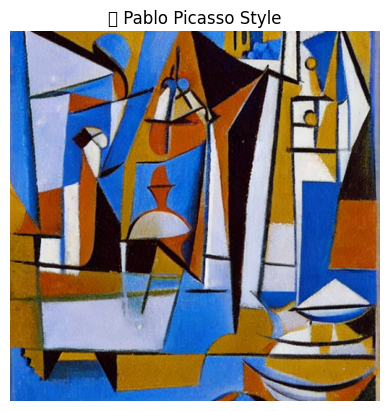

📝 Final Prompt:
 A mystical river flowing through a floating city, in the artistic style of Pablo Picasso. Artistic details: Image: Pablo_Picasso_319.jpg
Description: Portrait in the style of cubism, muted blues and browns, fragmented shapes, visible brushstrokes, melancholic mood, strong outlines, and a dreamlike quality. Image: Pablo_Picasso_316.jpg
Description: Cubist portrait, muted grayscale palette, geometric shapes and planes, bold black outlines, textured brushstrokes, melancholic mood, fragmented form, distorted perspective. Image: Pablo_Picasso_308.jpg
Description: Portrait in blues: somber, melancholic atmosphere; simplified forms, thick impasto brushstrokes, limited palette, introspection.


In [37]:
# 9. A mystical river flowing through a floating city
artist_name = "Pablo Picasso"
image, prompt_used = generate_image("A mystical river flowing through a floating city", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/floating_city_picasso_style.png")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lo _ 5 . jpg description : surrealist portrait , intense gaze , earth - toned skin , surrounded by dense foliage , dreamlike realism , delicate yet defined brushstrokes , intimate composition , subtly melancholic mood . image : frida _ kahlo _ 8 1 . jpg description : portrait fragment in a naive style , terracotta skin tones and red accents , textured impasto brushstrokes , stylized floral background with heavy outlines , expression of quiet intensity .']


  0%|          | 0/50 [00:00<?, ?it/s]

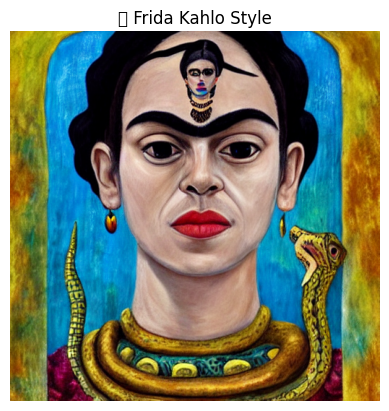

📝 Final Prompt:
 A hidden underwater kingdom ruled by sea serpents, in the artistic style of Frida Kahlo. Artistic details: Image: Frida_Kahlo_68.jpg
Description: Expressionist portrait, close-up, ochre and sienna tones, somber mood, textured brushstrokes, dreamlike quality, surreal juxtaposition of faces and masks. Image: Frida_Kahlo_5.jpg
Description: Surrealist portrait, intense gaze, earth-toned skin, surrounded by dense foliage, dreamlike realism, delicate yet defined brushstrokes, intimate composition, subtly melancholic mood. Image: Frida_Kahlo_81.jpg
Description: Portrait fragment in a naive style, terracotta skin tones and red accents, textured impasto brushstrokes, stylized floral background with heavy outlines, expression of quiet intensity.


In [38]:
# 10. A hidden underwater kingdom ruled by sea serpents
artist_name = "Frida Kahlo"
image, prompt_used = generate_image("A hidden underwater kingdom ruled by sea serpents", artist_name)
print("📝 Final Prompt:\n", prompt_used)
image.save("/kaggle/working/sea_serpents_kahlo_style.png")